In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import plotly.graph_objects as go

In [2]:
#load dataset
nflx = pd.read_csv('titles.csv')

In [3]:
#head dataset
nflx.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
#info dataset
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [7]:
#some statistics of score
nflx.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [8]:
#Check the missing value data
nflx.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Dealing with missing value

Title

In [9]:
nflx2 = nflx
nflx2[nflx2['title'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1704,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [10]:
#Since only few information avaible and the missing data only 1, data with missing title will be removed
nflx2.dropna(subset=['title'], inplace=True)

Description

In [11]:
nflx2[nflx2['description'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1111,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600,NaN
1114,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,"['comedy', 'horror']",[],NaN,tt10033686,2.9,78.0,NaN,NaN
2105,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,"['documentation', 'reality']",['ES'],1.0,NaN,NaN,NaN,1.290,7.0
2189,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,22,"['scifi', 'action']",['JP'],1.0,NaN,NaN,NaN,0.600,0.5
2485,ts268283,RIDE ON TIME,SHOW,NaN,2018,TV-PG,22,[],['JP'],3.0,NaN,NaN,NaN,1.328,NaN
2754,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
2798,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,['documentation'],['BR'],NaN,tt16114198,6.6,5.0,1.400,5.8
3700,ts312044,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,['animation'],['JP'],1.0,tt18554728,8.3,30.0,7.501,9.7
4110,ts223062,ปริศนาล่าข้ามเวลา,SHOW,NaN,2019,TV-14,60,[],['TH'],1.0,NaN,NaN,NaN,1.473,7.0
4274,tm1172010,The Lockdown Plan,MOVIE,NaN,2020,NaN,49,[],[],NaN,tt13079112,6.5,NaN,NaN,NaN


Age certification

In [14]:
#Since few data with missing description, the data will be removed
nflx2[nflx2['age_certification'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [13]:
#Since many data with no age certification, the missing data will be replaced with "No age certification"
nflx2['age_certification'].fillna('No age certification', inplace=True)

Seasons

In [16]:
#Check the data with missing seasons
nflx2[nflx2['seasons'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,No age certification,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,No age certification,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,No age certification,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,No age certification,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,No age certification,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300


All of data that with missing seasons seems to have type 'movie', so I will confirm it


In [17]:
len(nflx2[(nflx2['type']=='MOVIE') & (nflx2['seasons'].isnull())])

3735

All data with movie type has no seasons. It's understandable since movie doesn't has seasons.

In [18]:
#replace missing seasons with 0 (No seasons)
nflx2['seasons'].fillna(0, inplace=True)

Imdb_id variable

In [19]:
nflx[nflx2['imdb_id'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
75,tm132164,Bill Hicks: Sane Man,MOVIE,Sane Man was filmed before Bill recorded ‘Dang...,1989,R,80,['comedy'],['US'],0.0,NaN,NaN,NaN,3.377,7.5
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,NaN,NaN,NaN,7.730,7.8
177,ts224786,Escalona,SHOW,"The improbable real life of Rafael Escalona, w...",1991,TV-MA,44,['drama'],['CO'],1.0,NaN,NaN,NaN,7.352,7.6
180,tm8687,Sam Kinison: Family Entertainment Hour,MOVIE,Get ready to scream with laughter! Sam Kinison...,1991,No age certification,49,['comedy'],['US'],0.0,NaN,NaN,NaN,1.840,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,ts302434,Plastic Cup Boyz: Laughing My Mask Off!,SHOW,Comedy collective The Plastic Cup Boyz pour ou...,2021,No age certification,33,[],[],1.0,NaN,NaN,NaN,0.683,NaN
5833,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.840,NaN
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,No age certification,26,[],[],0.0,NaN,NaN,NaN,1.179,7.0
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,No age certification,35,[],['US'],0.0,NaN,NaN,NaN,NaN,NaN


In [20]:
#Since only few data with missing imdb id, data with missing imdb id will be removed
nflx2.dropna(subset=['imdb_id'], inplace=True)

Imdb_score, Imdb votes

Data with missing value in both columns will be replaced by 0

Data with missing in only one column will be removed

In [21]:
nflx2[['imdb_score', 'imdb_votes']] =  nflx2[['imdb_score', 'imdb_votes']].fillna(0)
nflx2.dropna(subset='imdb_score', inplace=True)
nflx2.dropna(subset='imdb_votes', inplace=True)

Tmdb_popularity

In [23]:
nflx2[nflx2['tmdb_popularity'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [22]:
#Only few data with missing tmdb_popularity, so it will be removed 
nflx2.dropna(subset='tmdb_popularity', inplace=True)

8. Tmdb_score

In [24]:
nflx2[nflx2['tmdb_score'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
56,tm721687,Vaashi,MOVIE,"Ebin Mathew, a budding lawyer ambitiously join...",1983,No age certification,123,"['drama', 'thriller']",['IN'],0.0,tt13913068,6.7,388.0,3.790,NaN
79,tm342996,Duniya,MOVIE,Mohan Kumar's diligence and honesty lands him ...,1984,No age certification,170,"['action', 'drama']",['IN'],0.0,tt0301231,6.3,245.0,1.394,NaN
83,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,['comedy'],['US'],1.0,tt5944220,3.8,6.0,1.400,NaN
84,tm311264,Muqaddar Ka Faisla,MOVIE,"Muqaddar ka Faisla, is the story of Pandit Kri...",1987,No age certification,172,"['action', 'comedy', 'drama', 'family']",['IN'],0.0,tt0239682,4.8,69.0,2.236,NaN
85,tm411457,Pyar Ke Do Pal,MOVIE,"In order to assist her close friend, Rajni Tha...",1986,No age certification,125,"['drama', 'action']",['IN'],0.0,tt0358053,6.1,66.0,1.756,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN
5837,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,No age certification,108,['comedy'],['PH'],0.0,tt14412240,5.8,27.0,2.170,NaN
5839,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,No age certification,102,['comedy'],['MY'],0.0,tt16806990,7.0,66.0,2.112,NaN
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,No age certification,115,"['comedy', 'romance']",['PH'],0.0,tt13399802,7.1,50.0,1.383,NaN


In [25]:
#Only few data with missing tmdb_score, so it will be removed 
nflx2.dropna(subset='tmdb_score', inplace=True)

In [26]:
#Check data again
nflx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 1 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5189 non-null   object 
 1   title                 5189 non-null   object 
 2   type                  5189 non-null   object 
 3   description           5189 non-null   object 
 4   release_year          5189 non-null   int64  
 5   age_certification     5189 non-null   object 
 6   runtime               5189 non-null   int64  
 7   genres                5189 non-null   object 
 8   production_countries  5189 non-null   object 
 9   seasons               5189 non-null   float64
 10  imdb_id               5189 non-null   object 
 11  imdb_score            5189 non-null   float64
 12  imdb_votes            5189 non-null   float64
 13  tmdb_popularity       5189 non-null   float64
 14  tmdb_score            5189 non-null   float64
dtypes: float64(5), int64(

All missing values has been removed. 

In [43]:
#reset the index
nflx2.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [48]:
nflx2.drop(nflx.columns[[0,1]], axis=1,inplace=True)

In [124]:
#save new file to a csv file
nflx2.to_csv('nflx2.csv')
#pd.write_csv('file directory')

Exploratory Data Analysis

Title 

In [27]:
nflx2['title'].value_counts()

The Gift                              3
Taxi Driver                           2
Connected                             2
Johnny Test                           2
Fearless                              2
                                     ..
Friends from College                  1
An Evening with Beverly Luff Linn     1
RBG                                   1
Ravenous                              1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 5148, dtype: int64

Type

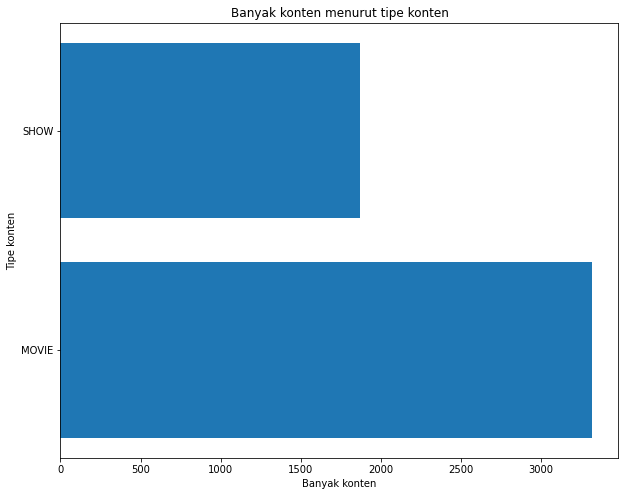

In [35]:
fig = plt.figure(figsize=(10,8))
plt.barh(y=nflx2['type'].unique(), width=nflx2['type'].value_counts())
plt.xlabel('Banyak konten')
plt.ylabel('Tipe konten')
plt.title('Banyak konten menurut tipe konten')
plt.show(fig)

Release year

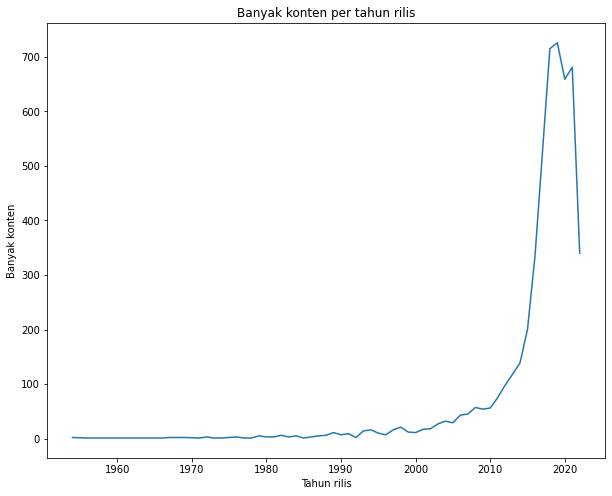

In [113]:
fig = plt.figure(figsize=(10,8))
relye_df = pd.DataFrame(nflx2['release_year'].value_counts())
relye_df.rename(columns={'release_year':'banyak_konten'}, inplace=True)
sns.lineplot(x = relye_df.index, y='banyak_konten', data=relye_df)
plt.xlabel('Tahun rilis')
plt.ylabel('Banyak konten')
plt.title('Banyak konten per tahun rilis')
plt.show(fig)

Age certification

In [120]:
fig = go.Figure(
    go.Pie(
    labels = nflx2['age_certification'].unique(),
    values = nflx2['age_certification'].value_counts(),
    hoverinfo = "label",
    textinfo = "percent"
))
fig.update_layout(
    title={'text': "Persentase konten berdasarkan sertifikasi usia",
            'y':0.9,
            'x':0.5})
fig.show()

Runtime

c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



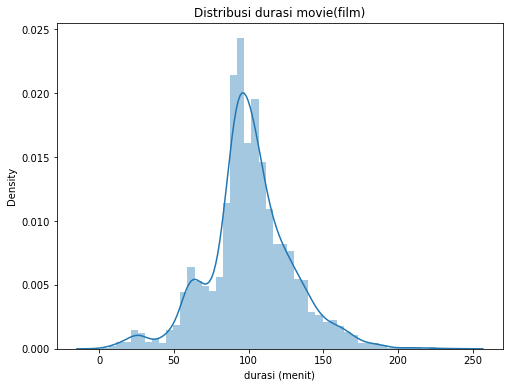

In [121]:
#movie
fig1 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='MOVIE']['runtime'])
plt.title('Distribusi durasi movie(film)')
plt.xlabel('durasi (menit)')
plt.show(fig1)

c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



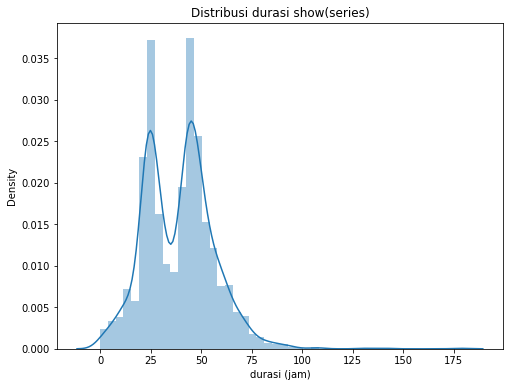

In [122]:
#series
fig2 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='SHOW']['runtime'])
plt.title('Distribusi durasi show(series)')
plt.xlabel('durasi (jam)')
plt.show(fig2)


Genre

In [50]:
genre_unlisted = nflx2['genres'].str.split(',', expand=True)
genre_unlisted 

,0,1,2,3,4,5,6,7,8,9
0,['drama','crime'],None,None,None,None,None,None,None,None
1,['drama','action','thriller','european'],None,None,None,None,None,None
2,['fantasy','action','comedy'],None,None,None,None,None,None,None
3,['war','action'],None,None,None,None,None,None,None,None
4,['comedy','european'],None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
5184,['drama','romance'],None,None,None,None,None,None,None,None
5185,['animation','family'],None,None,None,None,None,None,None,None
5186,['romance','comedy','drama'],None,None,None,None,None,None,None
5187,['comedy'],None,None,None,None,None,None,None,None,None


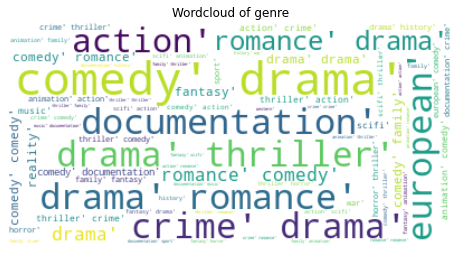

In [55]:
#Wordcloud of genres
genre = " ".join(i for i in nflx2.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(genre)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud of genre")
plt.axis("off")
plt.show()

In [36]:
genre_count= []
for i in nflx2['genres']:
   genre_count.append(len(i.split()))
nflx2['genre_count'] = genre_count

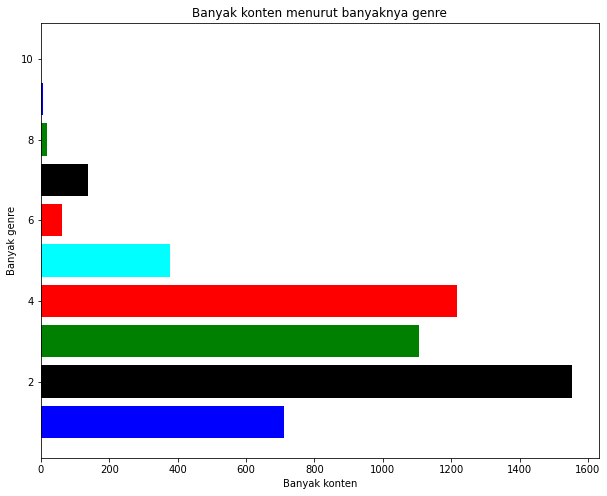

In [37]:
fig = plt.figure(figsize=(10,8))
ax = plt.barh(y=nflx2['genre_count'].unique(), width=nflx2['genre_count'].value_counts(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Banyak konten')
plt.ylabel('Banyak genre')
plt.title('Banyak konten menurut banyaknya genre')
plt.show(fig)

Production countries

In [56]:
prod_country_unlisted = nflx2['production_countries'].str.split(',', expand=True)
prod_country_unlisted 

,0,1,2,3,4,5,6
0,['US'],None,None,None,None,None,None
1,['US'],None,None,None,None,None,None
2,['GB'],None,None,None,None,None,None
3,['GB','US'],None,None,None,None,None
4,['GB'],None,None,None,None,None,None
...,...,...,...,...,...,...,...
5184,['ZA'],None,None,None,None,None,None
5185,[],None,None,None,None,None,None
5186,['EG'],None,None,None,None,None,None
5187,['CO'],None,None,None,None,None,None


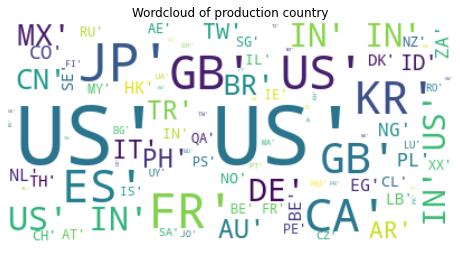

In [57]:
#Wordcloud of production country
prod_country = " ".join(i for i in nflx2.production_countries)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(prod_country)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud of production country")
plt.axis("off")
plt.show()

In [58]:
prod_ctry_count= []
for i in nflx2['production_countries']:
   prod_ctry_count.append(len(i.split()))
nflx2['prod_ctry_count'] = prod_ctry_count

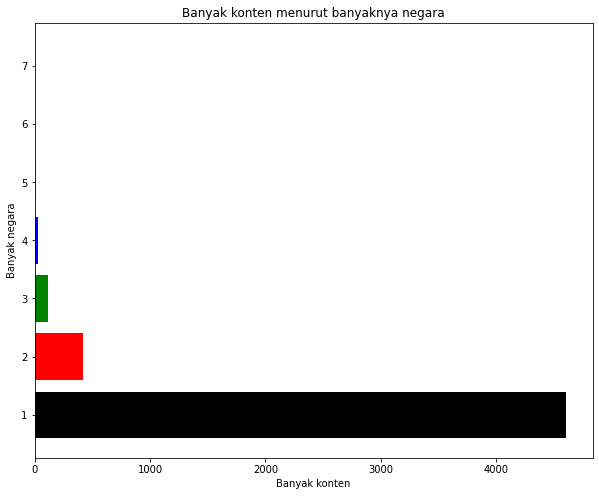

In [66]:
fig = plt.figure(figsize=(10,8))
ax = plt.barh(y=nflx2['prod_ctry_count'].unique(), width=nflx2['prod_ctry_count'].value_counts(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Banyak konten')
plt.ylabel('Banyak negara')
plt.title('Banyak konten menurut banyaknya negara')
plt.show(fig)

Seasons

For series only

In [67]:
nflx2[nflx2['type']=='SHOW']['seasons'].value_counts()

1.0     1033
2.0      362
3.0      179
4.0      116
5.0       75
6.0       35
7.0       18
8.0       10
9.0        9
11.0       7
10.0       6
12.0       3
15.0       3
24.0       2
13.0       2
20.0       1
32.0       1
19.0       1
29.0       1
14.0       1
37.0       1
21.0       1
25.0       1
42.0       1
39.0       1
16.0       1
Name: seasons, dtype: int64

<Figure size 720x576 with 0 Axes>

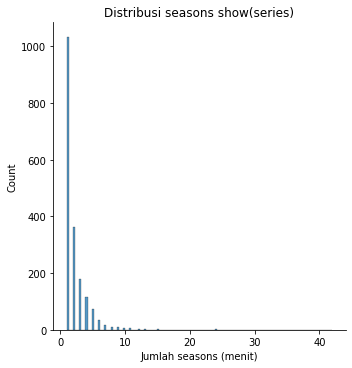

In [72]:
#sebaran seasons
fig1 = plt.figure(figsize=(10,8))
sns.displot(nflx2[nflx2['type']=='SHOW']['seasons'])
plt.title('Distribusi seasons show(series)')
plt.xlabel('Jumlah seasons')
plt.show(fig1)

Imdb score

In [74]:
#movie 
print("Rata-rata skor IMDb movie :",round(nflx2[nflx2['type']=='MOVIE']['imdb_score'].mean(),1))
#series
print("Rata-rata skor IMDb show :",round(nflx2[nflx2['type']=='SHOW']['imdb_score'].mean(),1))

Rata-rata skor IMDb movie : 6.2
Rata-rata skor IMDb show : 6.9


Tmdb score

In [75]:
#movie 
print("Rata-rata skor TMDB movie :",round(nflx2[nflx2['type']=='MOVIE']['tmdb_score'].mean(),1))
#series
print("Rata-rata skor TMDB show :",round(nflx2[nflx2['type']=='SHOW']['tmdb_score'].mean(),1))

Rata-rata skor TMDB movie : 6.5
Rata-rata skor TMDB show : 7.5


IMDb votes

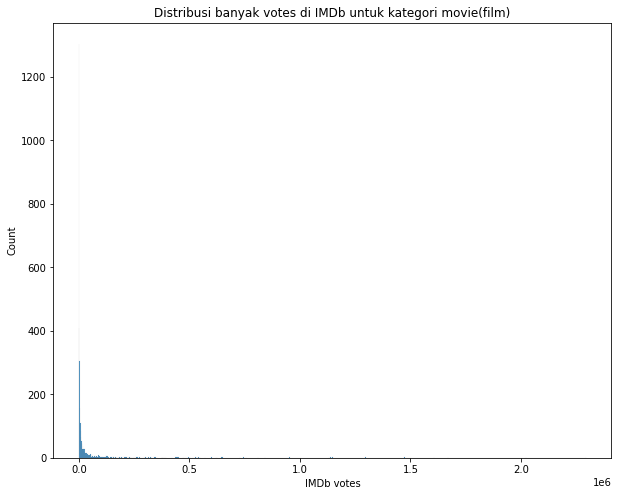

In [84]:
#movie
fig1 = plt.figure(figsize=(10,8))
sns.histplot(x = nflx2[nflx2['type']=='MOVIE']['imdb_votes'])
plt.title('Distribusi banyak votes di IMDb untuk kategori movie(film)')
plt.xlabel('IMDb votes')
plt.show(fig1)

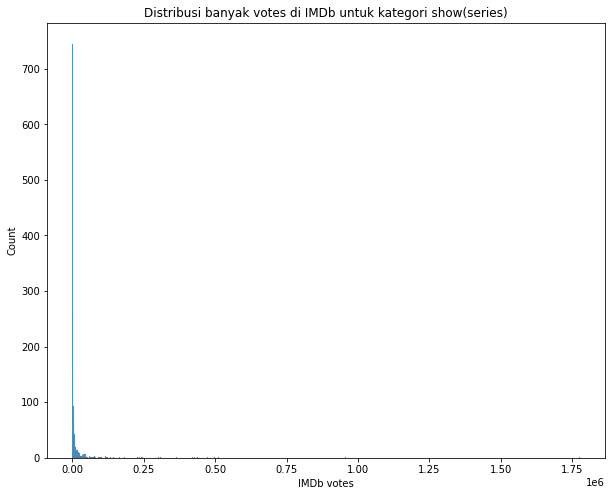

In [85]:
#shiw
fig1 = plt.figure(figsize=(10,8))
sns.histplot(x = nflx2[nflx2['type']=='SHOW']['imdb_votes'])
plt.title('Distribusi banyak votes di IMDb untuk kategori show(series)')
plt.xlabel('IMDb votes')
plt.show(fig1)

TMDB popularity

c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


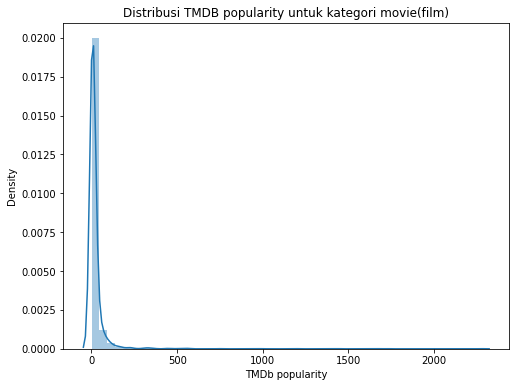

In [88]:
#movie  
fig1 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='MOVIE']['tmdb_popularity'])
plt.title('Distribusi TMDB popularity untuk kategori movie(film)')
plt.xlabel('TMDb popularity')
plt.show(fig1)


c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


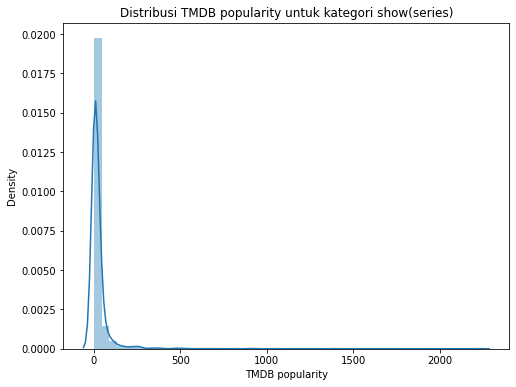

In [90]:
#show
fig2 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='SHOW']['tmdb_popularity'])
plt.title('Distribusi TMDB popularity untuk kategori show(series)')
plt.xlabel('TMDB popularity')
plt.show(fig2)